## Data Visualization

In [3]:
import os
import pandas as pd
import xml.etree.ElementTree as ET

annotations_df = pd.read_csv(r"E:\Floor-Plan-project\train\_annotations.csv")

# Function to convert CSV annotation to Pascal VOC XML format
def create_voc_xml(image_name, image_annotations, output_dir):
    filename = image_name
    width = image_annotations.iloc[0]['width']
    height = image_annotations.iloc[0]['height']
    
    annotation = ET.Element("annotation")
    
    ET.SubElement(annotation, "filename").text = filename
    
    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = "1" # Gray Scale
    
    for _, row in image_annotations.iterrows():
        class_name = row['class']
        xmin = row['xmin']
        xmax = row['xmax']
        ymin = row['ymin']
        ymax = row['ymax']
        
        obj = ET.SubElement(annotation, "object")
        ET.SubElement(obj, "name").text = class_name
        ET.SubElement(obj, "pose").text = "Unspecified"
        ET.SubElement(obj, "truncated").text = "0"
        ET.SubElement(obj, "difficult").text = "0"
        
        bndbox = ET.SubElement(obj, "bndbox")
        ET.SubElement(bndbox, "xmin").text = str(xmin)
        ET.SubElement(bndbox, "xmax").text = str(xmax)
        ET.SubElement(bndbox, "ymin").text = str(ymin)
        ET.SubElement(bndbox, "ymax").text = str(ymax)
    
    os.makedirs(output_dir, exist_ok=True)
    tree = ET.ElementTree(annotation)
    
    xml_filename = os.path.join(output_dir, f'{os.path.splitext(filename)[0]}.xml')
    tree.write(xml_filename)

# Output directory for XML files
output_dir = r"E:\Floor-Plan-project\train\annotation"

grouped = annotations_df.groupby('filename')

for image_name, group in grouped:
    create_voc_xml(image_name, group, output_dir)

print("Conversion to VOC XML format completed.")


Conversion to VOC XML format completed.


In [5]:
import os
import pandas as pd
import xml.etree.ElementTree as ET

annotations_df = pd.read_csv(r"E:\Floor-Plan-project\test\_annotations.csv")

# Function to convert CSV annotation to Pascal VOC XML format
def create_voc_xml(image_name, image_annotations, output_dir):
    filename = image_name
    width = image_annotations.iloc[0]['width']
    height = image_annotations.iloc[0]['height']
    
    annotation = ET.Element("annotation")
    
    ET.SubElement(annotation, "filename").text = filename
    
    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = "1" # Gray Scale
    
    for _, row in image_annotations.iterrows():
        class_name = row['class']
        xmin = row['xmin']
        xmax = row['xmax']
        ymin = row['ymin']
        ymax = row['ymax']
        
        obj = ET.SubElement(annotation, "object")
        ET.SubElement(obj, "name").text = class_name
        ET.SubElement(obj, "pose").text = "Unspecified"
        ET.SubElement(obj, "truncated").text = "0"
        ET.SubElement(obj, "difficult").text = "0"
        
        bndbox = ET.SubElement(obj, "bndbox")
        ET.SubElement(bndbox, "xmin").text = str(xmin)
        ET.SubElement(bndbox, "xmax").text = str(xmax)
        ET.SubElement(bndbox, "ymin").text = str(ymin)
        ET.SubElement(bndbox, "ymax").text = str(ymax)
    
    os.makedirs(output_dir, exist_ok=True)
    tree = ET.ElementTree(annotation)
    
    xml_filename = os.path.join(output_dir, f'{os.path.splitext(filename)[0]}.xml')
    tree.write(xml_filename)

# Output directory for XML files
output_dir = r"E:\Floor-Plan-project\test\annotation"

grouped = annotations_df.groupby('filename')

for image_name, group in grouped:
    create_voc_xml(image_name, group, output_dir)

print("Conversion to VOC XML format completed.")

Conversion to VOC XML format completed.


In [6]:
import os
import pandas as pd
import xml.etree.ElementTree as ET

annotations_df = pd.read_csv(r"E:\Floor-Plan-project\valid\_annotations.csv")

# Function to convert CSV annotation to Pascal VOC XML format
def create_voc_xml(image_name, image_annotations, output_dir):
    filename = image_name
    width = image_annotations.iloc[0]['width']
    height = image_annotations.iloc[0]['height']
    
    annotation = ET.Element("annotation")
    
    ET.SubElement(annotation, "filename").text = filename
    
    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = "1" # Gray Scale
    
    for _, row in image_annotations.iterrows():
        class_name = row['class']
        xmin = row['xmin']
        xmax = row['xmax']
        ymin = row['ymin']
        ymax = row['ymax']
        
        obj = ET.SubElement(annotation, "object")
        ET.SubElement(obj, "name").text = class_name
        ET.SubElement(obj, "pose").text = "Unspecified"
        ET.SubElement(obj, "truncated").text = "0"
        ET.SubElement(obj, "difficult").text = "0"
        
        bndbox = ET.SubElement(obj, "bndbox")
        ET.SubElement(bndbox, "xmin").text = str(xmin)
        ET.SubElement(bndbox, "xmax").text = str(xmax)
        ET.SubElement(bndbox, "ymin").text = str(ymin)
        ET.SubElement(bndbox, "ymax").text = str(ymax)
    
    os.makedirs(output_dir, exist_ok=True)
    tree = ET.ElementTree(annotation)
    
    xml_filename = os.path.join(output_dir, f'{os.path.splitext(filename)[0]}.xml')
    tree.write(xml_filename)

# Output directory for XML files
output_dir = r"E:\Floor-Plan-project\valid\annotation"

grouped = annotations_df.groupby('filename')

for image_name, group in grouped:
    create_voc_xml(image_name, group, output_dir)

print("Conversion to VOC XML format completed.")

Conversion to VOC XML format completed.


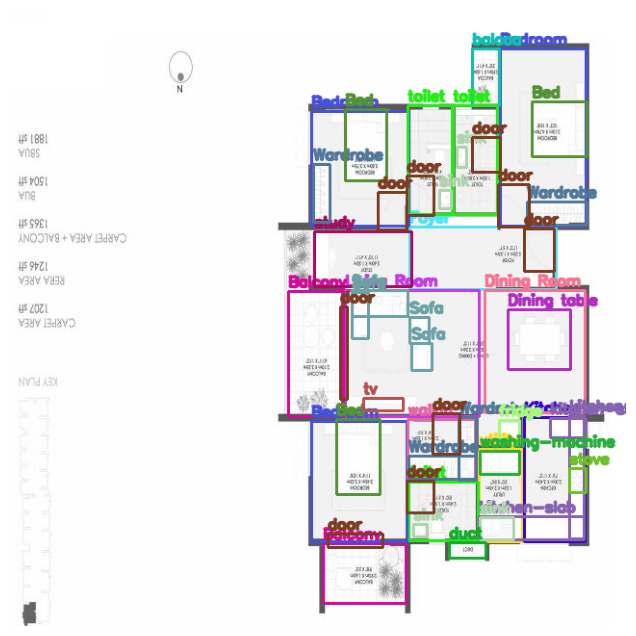

In [2]:
import os
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import random

image_folder = r"E:\Floor-Plan-project\train"  
annotation_folder = r"E:\Floor-Plan-project\train\annotation" 

# Dictionary to store class-color mappings
class_colors = {}

def get_class_color(class_name):
    if class_name not in class_colors:
        class_colors[class_name] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return class_colors[class_name]

# Function to parse XML and extract bounding box information
def parse_voc_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    objects = []
    for obj in root.findall('object'):
        class_name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        
        objects.append((class_name, xmin, ymin, xmax, ymax))
    
    return objects

# Function to display image with bounding boxes
def visualize_image(image_path, annotation_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    
    objects = parse_voc_xml(annotation_path)
    
    for obj in objects:
        class_name, xmin, ymin, xmax, ymax = obj
        color = get_class_color(class_name)  
        
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 2)  
        cv2.putText(image, class_name, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, color, 2, cv2.LINE_AA)  
    
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

filename = r"Engrace-2-B2_JPG.rf.75e0f424ee2842dad24c4d93e456fe87.jpg" 

image_path = os.path.join(image_folder, filename)
xml_path = os.path.join(annotation_folder, os.path.splitext(filename)[0] + ".xml")

if os.path.exists(image_path) and os.path.exists(xml_path):
    visualize_image(image_path, xml_path)
else:
    print("Image or annotation file not found.")



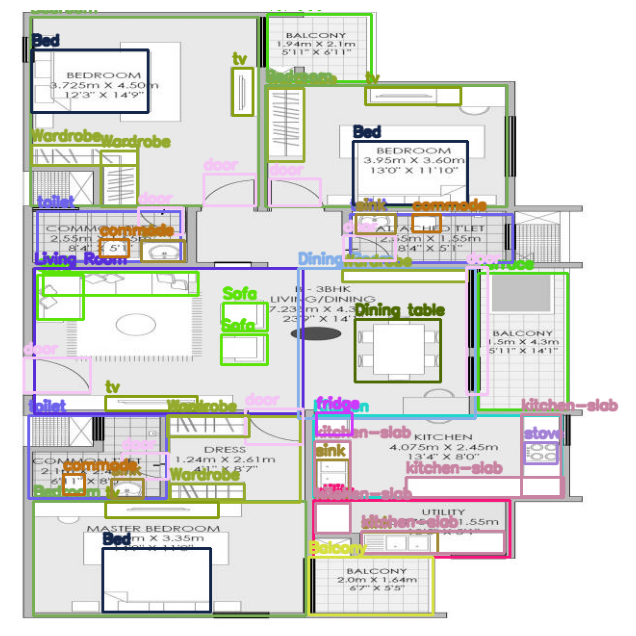

In [ ]:
import os
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import random

image_folder = r"E:\Floor-Plan-project\train"  
annotation_folder = r"E:\Floor-Plan-project\train\annotation" 

# Dictionary to store class-color mappings
class_colors = {}

def get_class_color(class_name):
    if class_name not in class_colors:
        class_colors[class_name] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return class_colors[class_name]

# Function to parse XML and extract bounding box information
def parse_voc_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    objects = []
    for obj in root.findall('object'):
        class_name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        
        objects.append((class_name, xmin, ymin, xmax, ymax))
    
    return objects

# Function to display image with bounding boxes
def visualize_image(image_path, annotation_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    
    objects = parse_voc_xml(annotation_path)
    
    for obj in objects:
        class_name, xmin, ymin, xmax, ymax = obj
        color = get_class_color(class_name)  
        
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 2)  
        cv2.putText(image, class_name, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, color, 2, cv2.LINE_AA)  
    
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

filename = "Vista-1_JPG.rf.42cb3ef83c7879ef77bf365e9a66403a.jpg"
image_path = os.path.join(image_folder, filename)
xml_path = os.path.join(annotation_folder, os.path.splitext(filename)[0] + ".xml")

if os.path.exists(image_path) and os.path.exists(xml_path):
    visualize_image(image_path, xml_path)
else:
    print("Image or annotation file not found.")



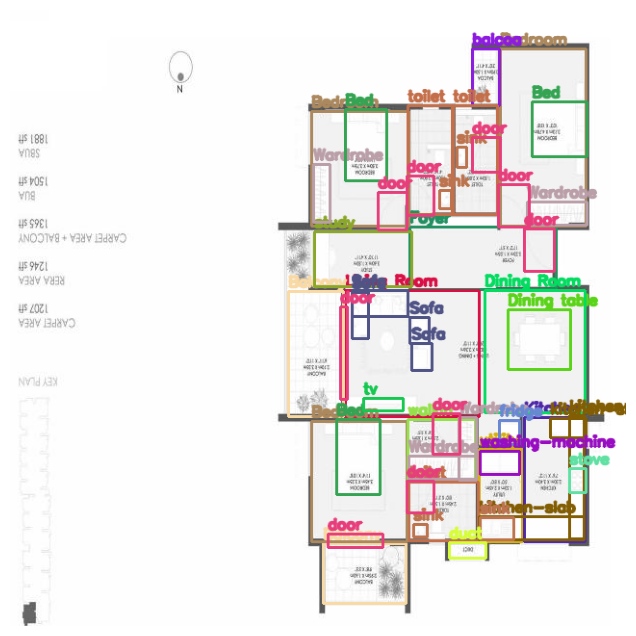

In [3]:
import os
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import random

image_folder = r"E:\Floor-Plan-project\train"  
annotation_folder = r"E:\Floor-Plan-project\train\annotation" 

# Dictionary to store class-color mappings
class_colors = {}

def get_class_color(class_name):
    if class_name not in class_colors:
        class_colors[class_name] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return class_colors[class_name]

# Function to parse XML and extract bounding box information
def parse_voc_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    objects = []
    for obj in root.findall('object'):
        class_name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        
        objects.append((class_name, xmin, ymin, xmax, ymax))
    
    return objects

# Function to display image with bounding boxes
def visualize_image(image_path, annotation_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    
    objects = parse_voc_xml(annotation_path)
    
    for obj in objects:
        class_name, xmin, ymin, xmax, ymax = obj
        color = get_class_color(class_name)  
        
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 2)  
        cv2.putText(image, class_name, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, color, 2, cv2.LINE_AA)  
    
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

filename = r"Engrace-2-B2_JPG.rf.75e0f424ee2842dad24c4d93e456fe87.jpg" 

image_path = os.path.join(image_folder, filename)
xml_path = os.path.join(annotation_folder, os.path.splitext(filename)[0] + ".xml")

if os.path.exists(image_path) and os.path.exists(xml_path):
    visualize_image(image_path, xml_path)
else:
    print("Image or annotation file not found.")



## Data Cleaning

In [5]:
import os

labels_path = r"E:\Floor-Plan-project\Floor-plan-segmentation.v17i.yolov8\valid\labels" 

desired_classes = [0, 2, 3, 5, 6, 7, 12, 15, 19, 21,25, 26,28] 

filtered_labels_path = r"E:\Floor-Plan-project\Floor-plan-segmentation.v17i.yolov8\valid\labels"

for txt_file in os.listdir(labels_path):
    if txt_file.endswith(".txt"):
        file_path = os.path.join(labels_path, txt_file)
        
        with open(file_path, "r") as f:
            lines = f.readlines()

        # Keep only lines with desired classes
        filtered_lines = [line for line in lines if int(line.split()[0]) in desired_classes]

        # Save filtered labels in a new folder (so original dataset remains unchanged)
        new_file_path = os.path.join(filtered_labels_path, txt_file)
        with open(new_file_path, "w") as f:
            f.writelines(filtered_lines)

print("✅ Filtering complete! Unwanted classes removed from labels.")
print(f"Filtered labels are saved in: {filtered_labels_path}")

✅ Filtering complete! Unwanted classes removed from labels.
Filtered labels are saved in: E:\Floor-Plan-project\Floor-plan-segmentation.v17i.yolov8\valid\labels
